# Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd 

# Data Balancing libraries
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithm Libraries
from sklearn.model_selection import KFold
from sklearn import svm

# Evaluation metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Dataset

In [2]:
# Load the csv data file
data = pd.read_csv("/content/drive/My Drive/dataset_san.csv")
# data = pd.read_csv("/content/dataset.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   32    1   1      95.0   NaN  NaN  ...    0.0      0.7    1.0 NaN   NaN       1
1   34    1   4     115.0   NaN  NaN  ...    0.0      0.2    1.0 NaN   NaN       1
2   35    1   4       NaN   NaN  NaN  ...    1.0      NaN    NaN NaN   7.0       3
3   36    1   4     110.0   NaN  NaN  ...    1.0      1.0    2.0 NaN   6.0       1
4   38    0   4     105.0   NaN  NaN  ...    0.0      2.8    1.0 NaN   NaN       2

[5 rows x 14 columns]

In [3]:
print("Number of rows and columns in the dataset: ", data.shape)
print("Features in the dataset: \n", data.columns)

Number of rows and columns in the dataset:  (920, 14)
Features in the dataset: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
# Move the target column to position 0

target = data['target']
data.drop(labels=['target'], axis=1,inplace = True)
data.insert(0,'target', target)
data.columns

Index(['target', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

# Feature Engineering

## Replace the Categorical attributes with median value and continuous attribute with the mean values

In [5]:
# data_final = data.copy(deep = True)

mean_cols = [['oldpeak']]
median_cols = [['trestbps','chol','thalach']]

# Replace with mean
for column in mean_cols:
    mean = data[column].mean(skipna=True)
    data[column] = data[column].replace(np.NaN, mean)

# Replace with median
for column in median_cols:
    med = data[column].median(skipna=True)
    data[column] = data[column].replace(np.NaN, med)

data.isnull().sum()

target        0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalach       0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
dtype: int64

## Replace the null values in the columns with the mode value

In [6]:
mode_cols = [['fbs','restecg', 'exang', 'slope', 'ca', 'thal' ]]

for column in mode_cols:
    mode = data[column].mode()

mode_dict = mode.to_dict().values()
modeval = []
for i in mode_dict:
    modeval.append(i[0])

for col in range(0,len(mode_cols[0])):
    
    data[mode_cols[0][col]] = data[mode_cols[0][col]].replace(np.NaN,modeval[col])
data.isnull().sum()

target      0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### In the dataset 5 unique values are present corresponding to the target. So, we labelled values 1, 2, 3, 4 to 1 (patient is sufferening from heart disease) and 0 (patient is not suffering from heart disease) 

In [0]:
def plotFreqDist(data):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.countplot(x="target", data=data)
    plt.title('Frequency distribution of Target variable')
    plt.show()

Number of samples with classes: 
1    509
0    411
Name: target, dtype: int64


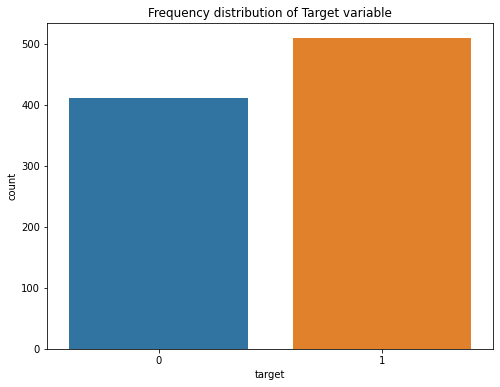

In [8]:
def binary_target(data):
    target = data['target'].replace([1,2,3,4],1)
    print("Number of samples with classes: ")
    print(target.value_counts())
    data['target'] = target    
    plotFreqDist(data)
    return data, target

data, target = binary_target(data)

In [9]:
data

target  age  sex  cp  trestbps  ...  exang   oldpeak  slope   ca  thal
0         1   32    1   1      95.0  ...    0.0  0.700000    1.0  0.0   3.0
1         1   34    1   4     115.0  ...    0.0  0.200000    1.0  0.0   3.0
2         1   35    1   4     130.0  ...    1.0  0.878788    2.0  0.0   7.0
3         1   36    1   4     110.0  ...    1.0  1.000000    2.0  0.0   6.0
4         1   38    0   4     105.0  ...    0.0  2.800000    1.0  0.0   3.0
..      ...  ...  ...  ..       ...  ...    ...       ...    ...  ...   ...
915       1   54    0   4     127.0  ...    0.0  0.000000    2.0  0.0   3.0
916       0   62    1   1     130.0  ...    0.0  0.878788    2.0  0.0   3.0
917       1   55    1   4     122.0  ...    0.0  0.000000    2.0  0.0   6.0
918       0   58    1   4     130.0  ...    0.0  0.878788    2.0  0.0   3.0
919       1   62    1   2     120.0  ...    1.0  0.000000    2.0  0.0   3.0

[920 rows x 14 columns]

# Feature Selection

## Select k-best features using the Chi2 method

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_Kbest(data):
    X = data.iloc[:,1:]  #independent columns
    y = data.iloc[:,0]    #target column i.e price range
    
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=f_regression, k=13)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    X_new = fit.transform(X)
    
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Feature','Importance Score']  #naming the dataframe columns
    
    print("The features with their importance score using the Chi2 method: \n")
    print(featureScores.nlargest(13,'Importance Score'))  #print 10 best features
    features = featureScores.nlargest(13,'Importance Score')
    column = features.columns
    x = list(features[column[0]])
    
    X_features = pd.DataFrame(data=X_new,columns=x)
    
    return X_features, features

X_features, features = select_Kbest(data)

The features with their importance score using the Chi2 method: 

     Feature  Importance Score
2         cp        262.725707
8      exang        212.560562
7    thalach        156.714892
9    oldpeak        148.260582
1        sex         95.719131
12      thal         81.860402
0        age         79.738300
10     slope         40.445856
11        ca         25.613695
5        fbs         10.848369
3   trestbps          9.512860
6    restecg          3.577423
4       chol          0.183894


In [11]:
impor = list(features['Importance Score'])
fea = list(features['Feature'])
print(impor)
print(fea)

[262.7257072968447, 212.56056226630352, 156.71489150217607, 148.26058165690182, 95.71913136411821, 81.8604018452113, 79.73829968115771, 40.44585567575834, 25.6136951115509, 10.848369108562352, 9.512860100310355, 3.577422733243989, 0.18389419982308228]
['cp', 'exang', 'thalach', 'oldpeak', 'sex', 'thal', 'age', 'slope', 'ca', 'fbs', 'trestbps', 'restecg', 'chol']


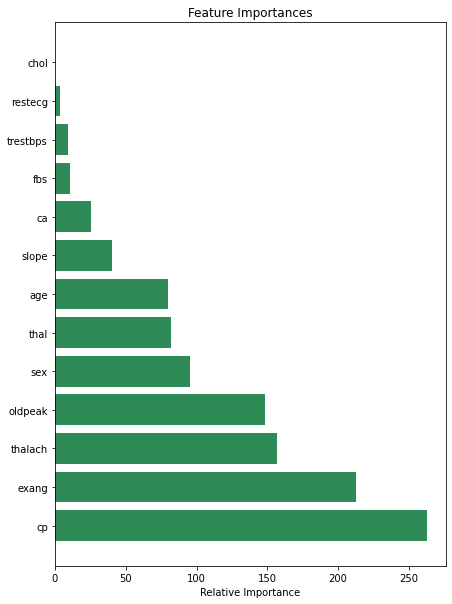

In [12]:
plt.figure(figsize=[7,10])
plt.title('Feature Importances')
plt.barh(range(len(impor)), impor, color='seagreen', align='center')
plt.yticks(range(len(fea)), [fea[i] for i in range(len(fea))])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
X_features['target'] = data['target']
# Move the target column to position 0

target = X_features['target']
X_features.drop(labels=['target'], axis=1,inplace = True)
X_features.insert(0,'target', target)
X_features.columns

Index(['target', 'cp', 'exang', 'thalach', 'oldpeak', 'sex', 'thal', 'age',
       'slope', 'ca', 'fbs', 'trestbps', 'restecg', 'chol'],
      dtype='object')

## Select k-best features using the random forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier

X = data.iloc[:,1:]  #independent columns
y = data.iloc[:,0] 

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X, y)

df_train_columns = [c for c in data.columns if c not in ['target']]
col_names = df_train_columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [0]:
# Select 6 best features using random forest regression model

P = indices[:]
Q = []
for index in P:
    Q.append(importances[index])

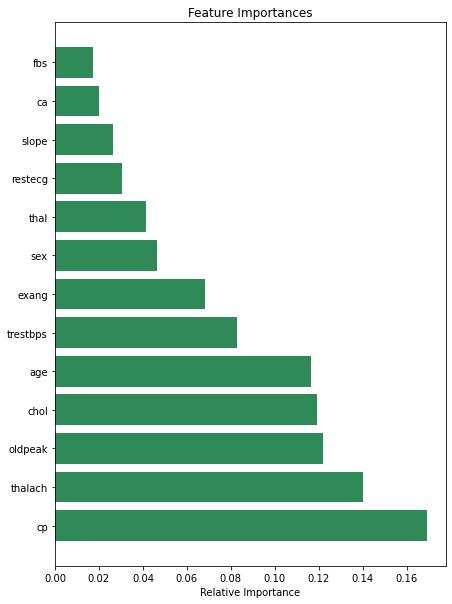

In [16]:
plt.figure(figsize=[7,10])
plt.title('Feature Importances')
plt.barh(range(len(Q)), Q, color='seagreen', align='center')
plt.yticks(range(len(P)), [col_names[i] for i in P])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
X_train = pd.DataFrame()

X_train['target'] = data['target']
for i in range(6):
    index = P[i]
    X_train[col_names[index]] = data[col_names[index]]
X_train

target  cp  thalach   oldpeak   chol  age  trestbps
0         1   1    127.0  0.700000  234.0   32      95.0
1         1   4    154.0  0.200000  234.0   34     115.0
2         1   4    130.0  0.878788  234.0   35     130.0
3         1   4    125.0  1.000000  234.0   36     110.0
4         1   4    166.0  2.800000  234.0   38     105.0
..      ...  ..      ...       ...    ...  ...       ...
915       1   4    154.0  0.000000  333.0   54     127.0
916       0   1    140.0  0.878788  139.0   62     130.0
917       1   4    100.0  0.000000  223.0   55     122.0
918       0   4    140.0  0.878788  385.0   58     130.0
919       1   2     93.0  0.000000  254.0   62     120.0

[920 rows x 7 columns]

## Correlation between the data features

In [18]:
def print_correlation(data):
    corr = data.corr()
    print("\nPrinting the correlation matrix...")
    plt.figure(figsize=(10,10))
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdYlGn", annot = True, fmt='.1g')
print_correlation(data)


Printing the correlation matrix...


## Balance the dataset using the smote technique

In [19]:
def balance_dataset(data, target):
    data = data.drop(columns = ['target'])
    print("Before Dataset Balancing...")
    print(data.shape, target.shape)
    # print(data, target)
    sm = SMOTE(random_state=42)
    x_smote, y_smote = sm.fit_resample(data, target)
    print("After Dataset Balancing...")
    print(x_smote.shape, y_smote.shape)
    print("Number of samples with classes: ")
    print(len(y_smote))
    return x_smote, y_smote   

x_smote, y_smote = balance_dataset(data,target)

Before Dataset Balancing...
(920, 13) (920,)
After Dataset Balancing...
(1018, 13) (1018,)
Number of samples with classes: 
1018


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Analysis of all features in the dataset

In [20]:
def Data_analysis(data):
    # print("Unique Values: ")
    for col in data.columns:
        data[col] = data[col].astype(str)
        l = []
        data[col] = data[col].astype(float)
        # print("FOR ATTR: ", col,data[col].unique())
    print("Replaced null values with mean of the feature value...")
    return data

data = Data_analysis(data)

Replaced null values with mean of the feature value...


## Remove the outliers from the dataset

In [0]:
df1 = data[data['target'] == 1]
# print (df1)
df1 = df1.reset_index()
df2 = data[data['target'] == 0]
# print (df2)

In [0]:
def remove_outliers(x_smote):
    clf = IsolationForest(random_state = 0)
    preds = clf.fit_predict(x_smote)
    print("Number of outliers using Isolation Forest: ",list(preds).count(-1))
    return preds

In [23]:
labels = remove_outliers(df1)

Number of outliers using Isolation Forest:  125


In [24]:
rows_tar1 = []
for i in range(0,len(labels)):
    if labels[i] == -1:   #outliers
        rows_tar1.append(i)

df1_new = df1[~df1.index.isin(rows_tar1)]
print(df1_new)

     index  target   age  sex   cp  ...  exang   oldpeak  slope   ca  thal
1        1     1.0  34.0  1.0  4.0  ...    0.0  0.200000    1.0  0.0   3.0
2        2     1.0  35.0  1.0  4.0  ...    1.0  0.878788    2.0  0.0   7.0
3        3     1.0  36.0  1.0  4.0  ...    1.0  1.000000    2.0  0.0   6.0
5        5     1.0  38.0  0.0  4.0  ...    0.0  0.000000    2.0  0.0   3.0
6        7     1.0  38.0  1.0  3.0  ...    1.0  0.000000    2.0  0.0   7.0
..     ...     ...   ...  ...  ...  ...    ...       ...    ...  ...   ...
502    911     1.0  62.0  1.0  4.0  ...    1.0  3.000000    2.0  0.0   3.0
503    912     1.0  53.0  1.0  4.0  ...    1.0  1.500000    2.0  0.0   3.0
504    913     1.0  62.0  1.0  4.0  ...    1.0  0.000000    2.0  0.0   3.0
505    914     1.0  46.0  1.0  4.0  ...    0.0  0.000000    2.0  0.0   3.0
507    917     1.0  55.0  1.0  4.0  ...    0.0  0.000000    2.0  0.0   6.0

[384 rows x 15 columns]


In [0]:
df1_new = df1_new.drop(['index'], axis = 1)

In [26]:
labels = remove_outliers(df2)

Number of outliers using Isolation Forest:  96


In [27]:
rows_tar0 = []
for i in range(0,len(labels)):
    if labels[i] == -1:   #outliers
        rows_tar0.append(i)

df2_new = df2[~df2.index.isin(rows_tar0)]
print(df2_new)

     target   age  sex   cp  trestbps  ...  exang   oldpeak  slope   ca  thal
6       0.0  38.0  1.0  3.0     100.0  ...    0.0 -1.100000    1.0  0.0   3.0
17      0.0  45.0  1.0  3.0     110.0  ...    0.0 -0.100000    1.0  0.0   3.0
41      0.0  53.0  1.0  2.0     130.0  ...    0.0  0.700000    3.0  0.0   3.0
47      0.0  53.0  1.0  4.0      80.0  ...    1.0  2.000000    3.0  0.0   3.0
51      0.0  55.0  1.0  2.0     140.0  ...    0.0  0.200000    1.0  0.0   3.0
..      ...   ...  ...  ...       ...  ...    ...       ...    ...  ...   ...
904     0.0  57.0  1.0  4.0     130.0  ...    1.0  1.000000    2.0  0.0   3.0
909     0.0  68.0  1.0  3.0     134.0  ...    1.0  0.000000    2.0  0.0   3.0
910     0.0  51.0  0.0  4.0     114.0  ...    0.0  1.000000    1.0  0.0   3.0
916     0.0  62.0  1.0  1.0     130.0  ...    0.0  0.878788    2.0  0.0   3.0
918     0.0  58.0  1.0  4.0     130.0  ...    0.0  0.878788    2.0  0.0   3.0

[354 rows x 14 columns]


In [28]:
df_final = pd.concat([df1_new, df2_new], ignore_index=True)
df_final

target   age  sex   cp  trestbps  ...  exang   oldpeak  slope   ca  thal
0       1.0  34.0  1.0  4.0     115.0  ...    0.0  0.200000    1.0  0.0   3.0
1       1.0  35.0  1.0  4.0     130.0  ...    1.0  0.878788    2.0  0.0   7.0
2       1.0  36.0  1.0  4.0     110.0  ...    1.0  1.000000    2.0  0.0   6.0
3       1.0  38.0  0.0  4.0     110.0  ...    0.0  0.000000    2.0  0.0   3.0
4       1.0  38.0  1.0  3.0     115.0  ...    1.0  0.000000    2.0  0.0   7.0
..      ...   ...  ...  ...       ...  ...    ...       ...    ...  ...   ...
733     0.0  57.0  1.0  4.0     130.0  ...    1.0  1.000000    2.0  0.0   3.0
734     0.0  68.0  1.0  3.0     134.0  ...    1.0  0.000000    2.0  0.0   3.0
735     0.0  51.0  0.0  4.0     114.0  ...    0.0  1.000000    1.0  0.0   3.0
736     0.0  62.0  1.0  1.0     130.0  ...    0.0  0.878788    2.0  0.0   3.0
737     0.0  58.0  1.0  4.0     130.0  ...    0.0  0.878788    2.0  0.0   3.0

[738 rows x 14 columns]

Correlation matrix after removing the outliers: 


Printing the correlation matrix...


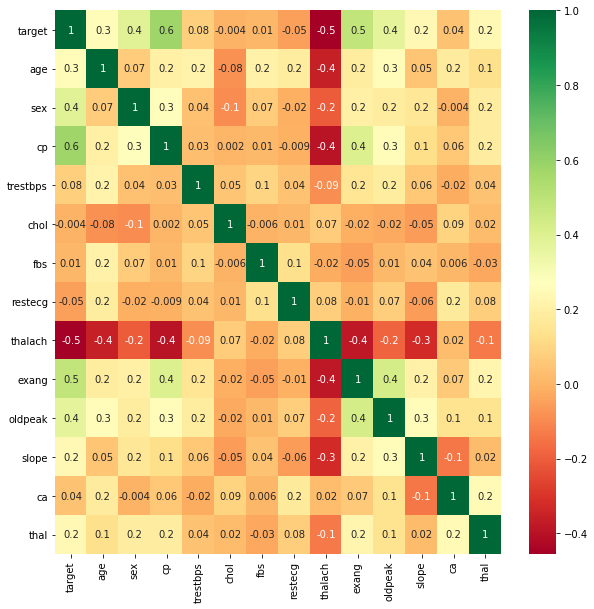

In [29]:
df_final = df_final.sample(frac=1)
# data = df_final
print("Correlation matrix after removing the outliers: \n")
print_correlation(df_final)


## Target distribution after balancing the dataset

In [0]:
# df_balanced = pd.DataFrame(x_smote) 
# df_balanced["target"]=y_smote
# sns.countplot(x=y_smote, data=df_balanced)

# Macine Learning Algorithms

## Split the dataset into testing and validation set

In [0]:
from sklearn.model_selection import train_test_split

def split_train_test(data):
    

    X = np.asarray(data.iloc[:, 1:])
    y = np.asarray(data.iloc[:, 0])
    
    xval, x_te, yval, y_te = train_test_split(X, y, test_size=0.33, random_state=42)
    X=xval
    y=yval
    
    return X, x_te, y, y_te
#### Spilit #####
Y_train = X_features['target']
X, x_te, y, y_te = split_train_test(X_features)
test_acc=[]

## Support Vector Machine

In [0]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=True)
clf = svm.SVC(kernel='linear', C=100)
accuracy_svm=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_svm.append(acc)

In [0]:
y_pred=clf.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy SVM: ",accuracy_score(y_te, y_pred))
print("Precision SVM",precision_score(y_te, y_pred, average='macro'))
print("Recall SVM",recall_score(y_te, y_pred, average='macro'))
print("F1 Score SVM: ",f1_score(y_te, y_pred, average='macro'))

Accuracy SVM:  0.7730263157894737
Precision SVM 0.7672845146412566
Recall SVM 0.7766618627274364
F1 Score SVM:  0.7688212927756654


## Naive Bayes Algorithm

In [0]:
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=True)
gnb = GaussianNB()
accuracy_gnb=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb.fit(X_train, y_train)
    y_pred=gnb.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_gnb.append(acc)

In [0]:
y_pred=gnb.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy GNB: ",accuracy_score(y_te, y_pred))
print("Precision GNB",precision_score(y_te, y_pred, average='macro'))
print("Recall GNB",recall_score(y_te, y_pred, average='macro'))
print("F1 Score GNB: ",f1_score(y_te, y_pred, average='macro'))

Accuracy GNB:  0.7467105263157895
Precision GNB 0.7426805465191932
Recall GNB 0.7519816249324446
F1 Score GNB:  0.7429020176392414


## Random Forest Algorithm

In [0]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=True)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
accuracy_rfc=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_rfc.append(acc)

In [0]:
y_pred=rfc.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy RFC: ",accuracy_score(y_te, y_pred))
print("Precision RFC",precision_score(y_te, y_pred, average='macro'))
print("Recall RFC",recall_score(y_te, y_pred, average='macro'))
print("F1 Score RFC: ",f1_score(y_te, y_pred, average='macro'))

Accuracy RFC:  0.7697368421052632
Precision RFC 0.7606534090909092
Recall RFC 0.764456854620789
F1 Score RFC:  0.7622346368715084


## XGB Boost Algorithm

In [0]:
import xgboost as xgb
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20 

In [0]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=True)
accuracy_xgb=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(param, D_train, steps)
    preds = model.predict(D_test)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    acc=accuracy_score(y_test, best_preds)
    accuracy_xgb.append(acc)

In [0]:
D_test = xgb.DMatrix(x_te, label=y_te)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
test_acc.append(accuracy_score(y_te, best_preds))
print("Accuracy XGB: ",accuracy_score(y_te, best_preds))
# print("Precision XGB",precision_score(y_te, y_pred, average='macro'))
# print("Recall XGB",recall_score(y_te, y_pred, average='macro'))
# print("F1 Score XGB: ",f1_score(y_te, y_pred, average='macro'))

Accuracy XGB:  0.7532894736842105


ValueError: ignored

## Decision Tree Algorithm

In [0]:
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(X)
KFold(n_splits=5, random_state=None, shuffle=True)
clf = DecisionTreeClassifier(random_state=0)
accuracy_dtc=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_dtc.append(acc)

In [0]:
y_pred=clf.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy DTC: ",accuracy_score(y_te, y_pred))
print("Precision DTC:",precision_score(y_te, y_pred, average='macro'))
print("Recall DTC:",recall_score(y_te, y_pred, average='macro'))
print("F1 Score DTC: ",f1_score(y_te, y_pred, average='macro'))
cm = confusion_matrix(y_te,y_pred)
# ax=sns.heatmap(cm, annot=True, fmt="d")

In [0]:
test_acc=test_acc[:5]

## Multi-Layer Perceptron Model

In [0]:
from sklearn.neural_network import MLPClassifier
kf = KFold(n_splits=5)
kf.get_n_splits(X)
accuracy_mlp=[]
classifier = MLPClassifier(hidden_layer_sizes=(300,200,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_mlp.append(acc)

In [0]:
y_pred=classifier.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy MLP: ",accuracy_score(y_te, y_pred))
print("Precision MLP",precision_score(y_te, y_pred, average='macro'))
print("Recall MLP",recall_score(y_te, y_pred, average='macro'))
print("F1 Score MLP: ",f1_score(y_te, y_pred, average='macro'))
cm = confusion_matrix(y_te,y_pred)
# ax=sns.heatmap(cm, annot=True, fmt="d")

## Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression
kf = KFold(n_splits=5)
kf.get_n_splits(X)
accuracy_logistic=[]
classifier = LogisticRegression(solver='newton-cg', max_iter=1000)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracy_logistic.append(acc)

In [0]:
y_pred=classifier.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy Logistic: ",accuracy_score(y_te, y_pred))
print("Precision Logistic",precision_score(y_te, y_pred, average='macro'))
print("Recall Logistic",recall_score(y_te, y_pred, average='macro'))
print("F1 Score Logistic: ",f1_score(y_te, y_pred, average='macro'))
cm = confusion_matrix(y_te,y_pred)
# ax=sns.heatmap(cm, annot=True, fmt="d")

# Deep Learning Model

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [43]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(X, y)

In [44]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X,y, cv=kfold)
accuracy_keras = results
accuracy_keras

array([0.82258064, 0.78048778, 0.78861791, 0.78861791, 0.84552848])

In [0]:
y_pred = estimator.predict(x_te)
test_acc.append(accuracy_score(y_te, y_pred))

In [46]:
print("Accuracy KerasClassifier: ",accuracy_score(y_te, y_pred))
print("Precision KerasClassifier:",precision_score(y_te, y_pred, average='macro'))
print("Recall KerasClassifier:",recall_score(y_te, y_pred, average='macro'))
print("F1 Score KerasClassifier:",f1_score(y_te, y_pred, average='macro'))

Accuracy KerasClassifier:  0.7861842105263158
Precision KerasClassifier: 0.7838719026228083
Recall KerasClassifier: 0.7646820392722031
F1 Score KerasClassifier: 0.7706991586887149


In [47]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
accuracy_Seq = []
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(32, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile the Model
    model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['acc'])

    # Train the Model
    history1 = model.fit(X[train], y[train], epochs=100, batch_size=5, verbose=0, validation_data=(X[test], y[test]))
    # evaluate the model
    scores = model.evaluate(X[test], y[test] , verbose = 0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accuracy_Seq.append(scores[1])
    

acc: 82.26%
acc: 78.86%
acc: 82.11%
acc: 82.93%
acc: 82.11%


In [48]:
y_pred = model.predict_classes(x_te)
test_acc.append(accuracy_score(y_te, y_pred))
print("Accuracy Sequential: ",accuracy_score(y_te, y_pred))
print("Precision Sequential",precision_score(y_te, y_pred, average='macro'))
print("Recall Sequential",recall_score(y_te, y_pred, average='macro'))
print("F1 Score Sequential: ",f1_score(y_te, y_pred, average='macro'))

Accuracy Sequential:  0.7763157894736842
Precision Sequential 0.76890756302521
Recall Sequential 0.7767068996577193
F1 Score Sequential:  0.7710741971207088


In [0]:
folds=[1,2,3,4,5]
ax = sns.lineplot(x=folds, y=accuracy_rfc,label="RFC")
ax = sns.lineplot(x=folds, y=accuracy_gnb,label="GNB")
ax = sns.lineplot(x=folds, y=accuracy_svm,label="SVM")
ax = sns.lineplot(x=folds, y=accuracy_xgb,label="XGB")
ax = sns.lineplot(x=folds, y=accuracy_mlp,label="MLP")
ax = sns.lineplot(x=folds, y=accuracy_mlp,label="DTC")
ax = sns.lineplot(x=folds, y=accuracy_logistic,label="LGC")
ax = sns.lineplot(x=folds, y=accuracy_keras,label = "KerasClf")
ax = sns.lineplot(x=folds, y=accuracy_Seq,label = "Sequential")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Folds")
ax.grid()

In [0]:
folds=[1,2,3,4,5]
ax = sns.lineplot(x=folds, y=accuracy_rfc,label="RFC")
ax = sns.lineplot(x=folds, y=accuracy_gnb,label="GNB")
ax = sns.lineplot(x=folds, y=accuracy_svm,label="SVM")
ax = sns.lineplot(x=folds, y=accuracy_xgb,label="XGB")
ax = sns.lineplot(x=folds, y=accuracy_logistic,label="LGC")
ax.grid()

In [0]:
x=["svm","gnb","rfc","xgb","mlp","dtc","logistic","keras","seq"]
ax = sns.barplot(x=test_acc,y=x,palette="rocket")
ax.set_xlabel('Accuracy')
plt.show()
